# Imports/Getting data 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [2]:
train = pd.read_csv('../project_2/datasets/train.csv')
test = pd.read_csv('../project_2/datasets/test.csv')
sample_sale = pd.read_csv('../project_2/datasets/sample_sub_reg.csv')

It looks like imputing was considered but left commented out. More comprehensive consideration of features (a heatmap, scatter plots) should be done. It isn't clear how much the EDA done actually informed feature selection.

# Cleaning Data

In [3]:
#Cleaning training data and test data

In [4]:
train.head(5)

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,532,1612,526352080,20,RL,85.0,10667,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,3,2007,WD,167300
1,415,2045,904100100,70,RL,107.0,12888,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2007,WD,219000
2,273,1962,535451110,20,RL,60.0,7200,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,7,2007,WD,129000
3,1460,229,905109130,60,RL,80.0,14000,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2010,WD,328000
4,250,1105,528363020,60,RL,NaN,11929,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,6,2008,WD,290000


In [5]:
test.head(5)

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,1124,2782,907200170,80,RL,55.0,10780,Pave,NaN,IR1,...,0,0,0,NaN,NaN,NaN,0,7,2006,WD
1,188,2569,535125060,60,RL,88.0,14200,Pave,NaN,Reg,...,0,0,0,NaN,GdPrv,NaN,0,5,2006,WD
2,1727,1062,528142020,60,RL,74.0,8899,Pave,NaN,Reg,...,0,0,0,NaN,NaN,NaN,0,6,2008,WD
3,1658,287,909100110,70,RL,66.0,6858,Pave,NaN,Reg,...,0,0,0,NaN,NaN,NaN,0,5,2010,WD
4,1424,2809,907410040,60,RL,74.0,8581,Pave,NaN,IR1,...,0,0,0,NaN,NaN,NaN,0,8,2006,New


In [6]:
sample_sale.head(10)

,Id,SalePrice
0,2,181479.1217
1,4,181479.1217
2,6,181479.1217
3,7,181479.1217
4,17,181479.1217
5,18,181479.1217
6,22,181479.1217
7,27,181479.1217
8,31,181479.1217
9,36,181479.1217


In [7]:
sample_sale.value_counts

<bound method DataFrame.value_counts of        Id    SalePrice
0       2  181479.1217
1       4  181479.1217
2       6  181479.1217
3       7  181479.1217
4      17  181479.1217
..    ...          ...
873  2919  181479.1217
874  2921  181479.1217
875  2922  181479.1217
876  2925  181479.1217
877  2928  181479.1217

[878 rows x 2 columns]>

Getting an overview of all data

In [8]:
#Finding null values 
train.isna().sum()

Unnamed: 0     0
Id             0
PID            0
MS SubClass    0
MS Zoning      0
              ..
Misc Val       0
Mo Sold        0
Yr Sold        0
Sale Type      0
SalePrice      0
Length: 82, dtype: int64

In [9]:
train.dropna(axis=1, how='all', inplace=True)

In [10]:
train.head(10)

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,532,1612,526352080,20,RL,85.0,10667,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,3,2007,WD,167300
1,415,2045,904100100,70,RL,107.0,12888,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2007,WD,219000
2,273,1962,535451110,20,RL,60.0,7200,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,7,2007,WD,129000
3,1460,229,905109130,60,RL,80.0,14000,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2010,WD,328000
4,250,1105,528363020,60,RL,NaN,11929,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,6,2008,WD,290000
5,413,909,909178160,50,RL,60.0,9900,Pave,NaN,Reg,...,0,0,NaN,GdWo,NaN,0,7,2009,WD,139500
6,1340,2642,902106090,70,RM,58.0,6451,Pave,Grvl,Reg,...,0,0,NaN,NaN,NaN,0,5,2006,WD,139900
7,310,1462,907255060,20,RL,NaN,14860,Pave,NaN,IR2,...,0,0,NaN,NaN,NaN,0,6,2008,WD,300000
8,1723,279,908103350,80,RL,65.0,6305,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,6,2010,WD,125200
9,585,1173,533217050,160,FV,24.0,2160,Pave,Pave,Reg,...,0,0,NaN,NaN,NaN,0,3,2008,WD,160000


Exploring all train, test and sales(sample_sub_reg) datasets.

In [11]:
train.drop(['Misc Feature', 'Fence'], axis=1, inplace=True)

In [12]:
train.drop(['Pool Area','BsmtFin SF 2'], axis=1, inplace=True)

In [13]:
train.drop(['Misc Val', 'Screen Porch', '3Ssn Porch', 'Enclosed Porch'], axis=1, inplace=True)

In [14]:
train.drop(['Pool QC', 'MS Zoning','Sale Type'], axis=1, inplace=True)

Dropping columns with little to no data.

In [15]:
train.head(20)

,Unnamed: 0,Id,PID,MS SubClass,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice
0,532,1612,526352080,20,85.0,10667,Pave,NaN,Reg,Lvl,...,2.0,525.0,TA,TA,Y,0,44,3,2007,167300
1,415,2045,904100100,70,107.0,12888,Pave,NaN,Reg,Bnk,...,2.0,498.0,TA,TA,Y,521,0,4,2007,219000
2,273,1962,535451110,20,60.0,7200,Pave,NaN,Reg,Lvl,...,2.0,720.0,TA,TA,Y,194,0,7,2007,129000
3,1460,229,905109130,60,80.0,14000,Pave,NaN,Reg,Lvl,...,2.0,533.0,TA,TA,Y,296,44,4,2010,328000
4,250,1105,528363020,60,NaN,11929,Pave,NaN,IR1,Lvl,...,3.0,751.0,TA,TA,Y,192,87,6,2008,290000
5,413,909,909178160,50,60.0,9900,Pave,NaN,Reg,Lvl,...,1.0,240.0,TA,TA,Y,335,0,7,2009,139500
6,1340,2642,902106090,70,58.0,6451,Pave,Grvl,Reg,Lvl,...,2.0,576.0,TA,TA,Y,264,0,5,2006,139900
7,310,1462,907255060,20,NaN,14860,Pave,NaN,IR2,Lvl,...,3.0,715.0,TA,TA,Y,182,35,6,2008,300000
8,1723,279,908103350,80,65.0,6305,Pave,NaN,Reg,Lvl,...,1.0,352.0,TA,TA,Y,0,0,6,2010,125200
9,585,1173,533217050,160,24.0,2160,Pave,Pave,Reg,Lvl,...,2.0,462.0,TA,TA,Y,0,48,3,2008,160000


Verify drops.

In [16]:
train.dtypes

Unnamed: 0         int64
Id                 int64
PID                int64
MS SubClass        int64
Lot Frontage     float64
                  ...   
Wood Deck SF       int64
Open Porch SF      int64
Mo Sold            int64
Yr Sold            int64
SalePrice          int64
Length: 71, dtype: object

In [17]:
categorical_columns = list(train.select_dtypes(include=['object']).columns)

train.drop(columns=categorical_columns, inplace=True)

# Save the training data without the categorical columns
train.to_csv('../project_2/datasets/train_without_categorical.csv')

# Save the original training data with the categorical columns
train.to_csv('../project_2/datasets/train_with_categorical.csv')

For the purposes of eliminating further issues down the exploration, I will be dropping categorical columns with the intention to reintroduce it later. The dropped columns will be saved as train_with_categorical.csv. 

In [18]:
train.head(5)

,Unnamed: 0,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice
0,532,1612,526352080,20,85.0,10667,6,6,1971,1971,...,7,1,1971.0,2.0,525.0,0,44,3,2007,167300
1,415,2045,904100100,70,107.0,12888,7,8,1937,1980,...,7,2,1937.0,2.0,498.0,521,0,4,2007,219000
2,273,1962,535451110,20,60.0,7200,5,8,1950,2002,...,5,0,1980.0,2.0,720.0,194,0,7,2007,129000
3,1460,229,905109130,60,80.0,14000,7,5,1996,1997,...,7,0,1996.0,2.0,533.0,296,44,4,2010,328000
4,250,1105,528363020,60,NaN,11929,8,7,1995,1995,...,9,1,1995.0,3.0,751.0,192,87,6,2008,290000


Checking to see if it worked and it did since there is now 34 columns.

In [19]:
train.dtypes

Unnamed: 0           int64
Id                   int64
PID                  int64
MS SubClass          int64
Lot Frontage       float64
Lot Area             int64
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Mas Vnr Area       float64
BsmtFin SF 1       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bsmt Full Bath     float64
Bsmt Half Bath     float64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
TotRms AbvGrd        int64
Fireplaces           int64
Garage Yr Blt      float64
Garage Cars        float64
Garage Area        float64
Wood Deck SF         int64
Open Porch SF        int64
Mo Sold              int64
Yr Sold              int64
SalePrice            int64
dtype: object

In [20]:
train.shape

(1538, 34)

In [21]:
train.isna().sum()

Unnamed: 0           0
Id                   0
PID                  0
MS SubClass          0
Lot Frontage       253
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        18
BsmtFin SF 1         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt       88
Garage Cars          0
Garage Area          0
Wood Deck SF         0
Open Porch SF        0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

In [22]:
train.describe()

,Unnamed: 0,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice
count,1538.000000,1538.000000,1.538000e+03,1538.000000,1285.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,...,1538.000000,1538.000000,1450.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,1024.970741,1469.562419,7.118700e+08,56.983095,69.378210,9955.676203,6.109883,5.559818,1971.860858,1984.168401,...,6.414174,0.578674,1978.768966,1.769831,472.576723,94.012354,47.527308,6.177503,2007.776983,181061.993498
std,588.860047,840.814349,1.886513e+08,43.217246,24.095542,5427.477335,1.428502,1.100363,30.173843,20.926357,...,1.562652,0.636649,25.638669,0.764587,218.266217,124.893497,66.927900,2.698290,1.305238,79552.718835
min,0.000000,1.000000,5.263011e+08,20.000000,21.000000,1476.000000,1.000000,1.000000,1872.000000,1950.000000,...,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,13100.000000
25%,522.250000,748.250000,5.284562e+08,20.000000,58.000000,7473.000000,5.000000,5.000000,1954.000000,1965.000000,...,5.000000,0.000000,1961.000000,1.000000,316.250000,0.000000,0.000000,4.000000,2007.000000,129925.000000
50%,1022.000000,1483.500000,5.354511e+08,50.000000,68.000000,9487.500000,6.000000,5.000000,1975.000000,1993.000000,...,6.000000,1.000000,1980.000000,2.000000,478.000000,0.000000,26.500000,6.000000,2008.000000,162250.000000
75%,1528.750000,2189.750000,9.071308e+08,70.000000,80.000000,11498.000000,7.000000,6.000000,2001.000000,2003.750000,...,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,8.000000,2009.000000,213000.000000
max,2050.000000,2930.000000,9.241510e+08,190.000000,313.000000,63887.000000,10.000000,9.000000,2010.000000,2010.000000,...,15.000000,4.000000,2207.000000,4.000000,1418.000000,870.000000,547.000000,12.000000,2010.000000,611657.000000


In [23]:
train = train.fillna(train.mean())

I will use the mean of the data to fill null values. 

In [24]:
train.isna().sum()

Unnamed: 0         0
Id                 0
PID                0
MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Mo Sold            0
Yr Sold            0
SalePrice          0
dtype: int64

Start of the test cleaning process

In [25]:
test.head()

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,1124,2782,907200170,80,RL,55.0,10780,Pave,NaN,IR1,...,0,0,0,NaN,NaN,NaN,0,7,2006,WD
1,188,2569,535125060,60,RL,88.0,14200,Pave,NaN,Reg,...,0,0,0,NaN,GdPrv,NaN,0,5,2006,WD
2,1727,1062,528142020,60,RL,74.0,8899,Pave,NaN,Reg,...,0,0,0,NaN,NaN,NaN,0,6,2008,WD
3,1658,287,909100110,70,RL,66.0,6858,Pave,NaN,Reg,...,0,0,0,NaN,NaN,NaN,0,5,2010,WD
4,1424,2809,907410040,60,RL,74.0,8581,Pave,NaN,IR1,...,0,0,0,NaN,NaN,NaN,0,8,2006,New


In [26]:
test.isna().sum()

Unnamed: 0        0
Id                0
PID               0
MS SubClass       0
MS Zoning         0
               ... 
Misc Feature    502
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
Length: 81, dtype: int64

Due to analyzing many columns with missing data and also features not applicable to our goal to predict data we will be dropping various categorical data in order to get our data to train, validate and test properly. 

In [27]:
test.drop(['Misc Feature','Pool QC','Pool Area'], axis=1, inplace=True)

In [28]:
test.drop(['Screen Porch','3Ssn Porch','Enclosed Porch'], axis=1, inplace=True)

In [29]:
test.drop(['MS Zoning','Sale Type','Fence', 'BsmtFin SF 2', 'Misc Val'], axis=1, inplace=True)

In [30]:
test.dtypes

Unnamed: 0         int64
Id                 int64
PID                int64
MS SubClass        int64
Lot Frontage     float64
                  ...   
Paved Drive       object
Wood Deck SF       int64
Open Porch SF      int64
Mo Sold            int64
Yr Sold            int64
Length: 70, dtype: object

In [31]:
train.shape

(1538, 34)

In [32]:
test.shape

(513, 70)

Comparing shapes.

In [33]:
test.isna().sum()

Unnamed: 0        0
Id                0
PID               0
MS SubClass       0
Lot Frontage     77
                 ..
Paved Drive       0
Wood Deck SF      0
Open Porch SF     0
Mo Sold           0
Yr Sold           0
Length: 70, dtype: int64

In [34]:
categorical_columns = list(test.select_dtypes(include=['object']).columns)

test.drop(columns=categorical_columns, inplace=True)

In [35]:
test.head(10)

,Unnamed: 0,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold
0,1124,2782,907200170,80,55.0,10780,5,5,1976,1976,...,1,6,0,1976.0,2.0,576.0,0,0,7,2006
1,188,2569,535125060,60,88.0,14200,7,6,1966,1966,...,1,8,2,1966.0,2.0,487.0,105,66,5,2006
2,1727,1062,528142020,60,74.0,8899,8,5,2007,2007,...,1,10,1,2007.0,3.0,656.0,100,24,6,2008
3,1658,287,909100110,70,66.0,6858,6,4,1915,1950,...,1,6,0,1920.0,1.0,216.0,0,66,5,2010
4,1424,2809,907410040,60,74.0,8581,7,5,2006,2006,...,1,7,0,2006.0,2.0,578.0,0,105,8,2006
5,100,1013,527214030,20,53.0,15401,9,5,2004,2004,...,1,7,1,2004.0,3.0,670.0,214,76,9,2008
6,56,98,533212020,160,24.0,2544,7,5,2004,2005,...,1,4,0,2004.0,2.0,480.0,0,172,2,2010
7,1477,1640,527252050,120,61.0,8035,9,5,2006,2006,...,1,6,1,2006.0,2.0,556.0,0,164,3,2007
8,1650,389,527375180,20,78.0,10140,6,6,1974,1974,...,1,6,1,1974.0,2.0,528.0,0,0,4,2009
9,1157,897,908225370,50,50.0,8405,4,3,1945,1950,...,1,9,0,1945.0,1.0,240.0,92,0,4,2009


In [36]:
test.describe

<bound method NDFrame.describe of      Unnamed: 0    Id        PID  MS SubClass  Lot Frontage  Lot Area  \
0          1124  2782  907200170           80          55.0     10780   
1           188  2569  535125060           60          88.0     14200   
2          1727  1062  528142020           60          74.0      8899   
3          1658   287  909100110           70          66.0      6858   
4          1424  2809  907410040           60          74.0      8581   
..          ...   ...        ...          ...           ...       ...   
508         572  2076  905377020           20           NaN     22692   
509         548  1256  535375160           50          45.0      7506   
510         530   900  908275040           90          65.0     10926   
511         445  2635  535478110          190          70.0      7000   
512         693  1111  528427010           20          92.0     11932   

     Overall Qual  Overall Cond  Year Built  Year Remod/Add  ...  \
0               5    

Doing the same cleaning steps to the cleaning data as my training data to this point. Not dropping columns in the testing data.

# EDA 

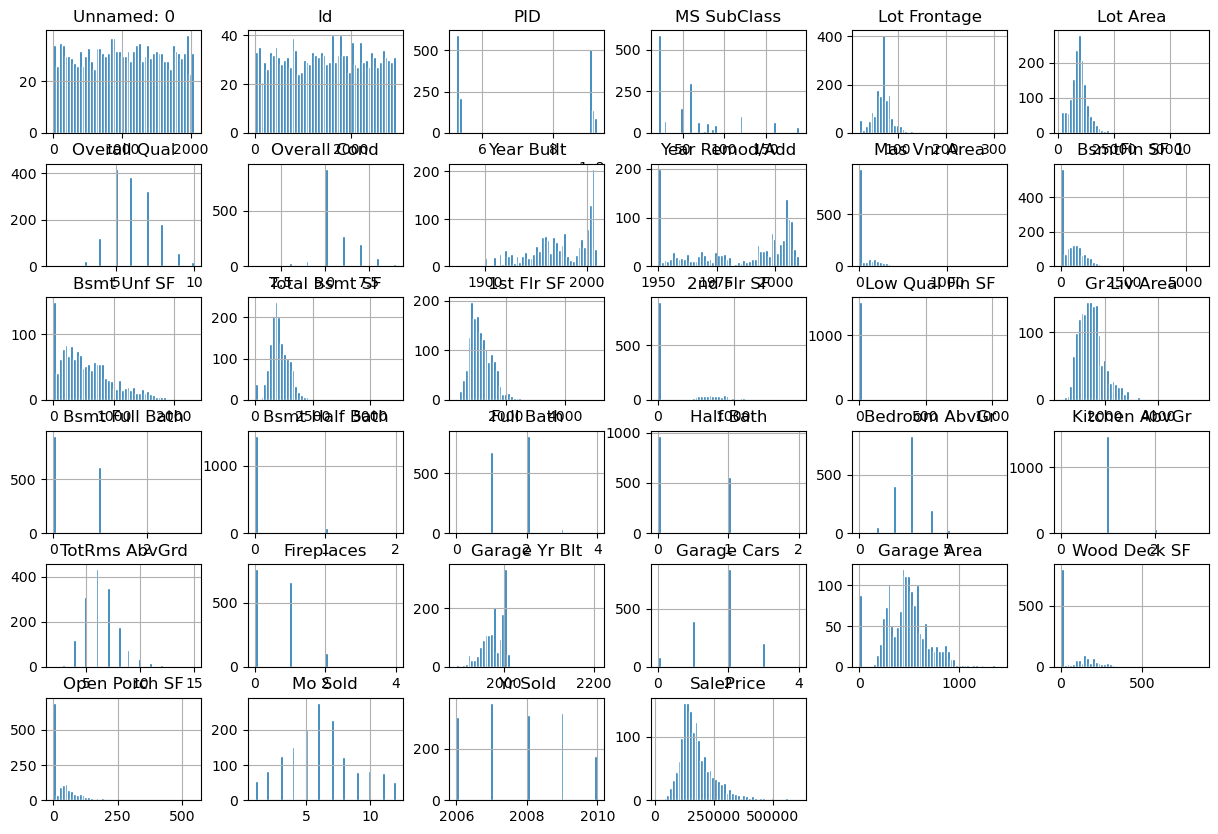

In [37]:
#Analyzing skew of all training data.
train.hist(bins=50, figsize=(15,10), ec='w')
plt.show()

Analyzing all training data. From my findings, it seems that many of the features tend to be skewed which will require normalization and scaling.

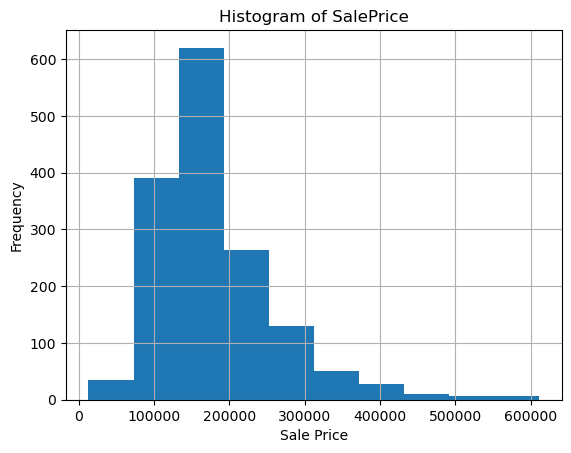

In [38]:
train['SalePrice'].hist()

plt.title('Histogram of SalePrice')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

Analyzing the distribution of the Sales prices of houses.

In [39]:
train.describe()

,Unnamed: 0,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice
count,1538.000000,1538.000000,1.538000e+03,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,...,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,1024.970741,1469.562419,7.118700e+08,56.983095,69.378210,9955.676203,6.109883,5.559818,1971.860858,1984.168401,...,6.414174,0.578674,1978.768966,1.769831,472.576723,94.012354,47.527308,6.177503,2007.776983,181061.993498
std,588.860047,840.814349,1.886513e+08,43.217246,22.023294,5427.477335,1.428502,1.100363,30.173843,20.926357,...,1.562652,0.636649,24.893888,0.764587,218.266217,124.893497,66.927900,2.698290,1.305238,79552.718835
min,0.000000,1.000000,5.263011e+08,20.000000,21.000000,1476.000000,1.000000,1.000000,1872.000000,1950.000000,...,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,13100.000000
25%,522.250000,748.250000,5.284562e+08,20.000000,60.000000,7473.000000,5.000000,5.000000,1954.000000,1965.000000,...,5.000000,0.000000,1962.000000,1.000000,316.250000,0.000000,0.000000,4.000000,2007.000000,129925.000000
50%,1022.000000,1483.500000,5.354511e+08,50.000000,69.378210,9487.500000,6.000000,5.000000,1975.000000,1993.000000,...,6.000000,1.000000,1978.768966,2.000000,478.000000,0.000000,26.500000,6.000000,2008.000000,162250.000000
75%,1528.750000,2189.750000,9.071308e+08,70.000000,78.000000,11498.000000,7.000000,6.000000,2001.000000,2003.750000,...,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,8.000000,2009.000000,213000.000000
max,2050.000000,2930.000000,9.241510e+08,190.000000,313.000000,63887.000000,10.000000,9.000000,2010.000000,2010.000000,...,15.000000,4.000000,2207.000000,4.000000,1418.000000,870.000000,547.000000,12.000000,2010.000000,611657.000000


Throughout the process, I gained intrest in looking into the dimension features of my features since I have heard that larger homes tend to be more expensive and that the dimension of land have an impact on how expensive the home is. While I am not entirely sure of this, I have decided to explore 3 features which include Bedrooms above ground labeled as Bedroom AbvGr, Square ft of perimeter labeled as Lot Area and Lot Frontage. All data will be examined to be taking into training, testing and validation.

In [40]:
scaler = StandardScaler()
train['SalePrice'] = scaler.fit_transform(train[['SalePrice']])

From analyzing the target, we need to implement normalization and scaling data for target which is sales price. Currently the data is skewed to the right and we want as close to a normal distribution in all our features including our target. 

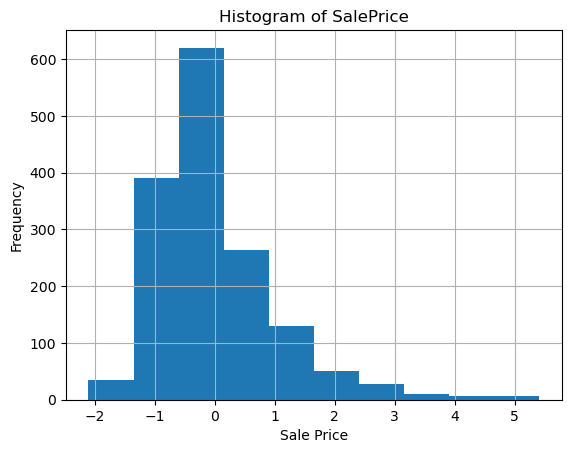

In [41]:
train['SalePrice'].hist()

plt.title('Histogram of SalePrice')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

Sale price for houses after scaling.

/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


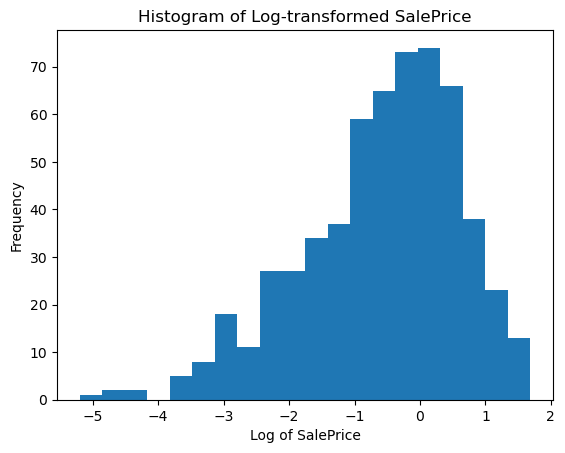

In [42]:
plt.hist(np.log(train['SalePrice']), bins=20)
plt.xlabel('Log of SalePrice')
plt.ylabel('Frequency')
plt.title('Histogram of Log-transformed SalePrice')
plt.show()

The purpose of log-transformed y data is to create a normal skew however, it didnt make a big diffrence in getting torwards a normal distribution.

In [43]:
train['Bedroom AbvGr'].value_counts()

Bedroom AbvGr
3    835
2    405
4    198
1     58
5     30
6      6
0      5
8      1
Name: count, dtype: int64

Now that we have scaled and attempted to normlize our target, we will being focusing on our choosen columns. For purposes of focusing on features we will begin looking at the general distrubtion and count for features to see what we are trying to work with.

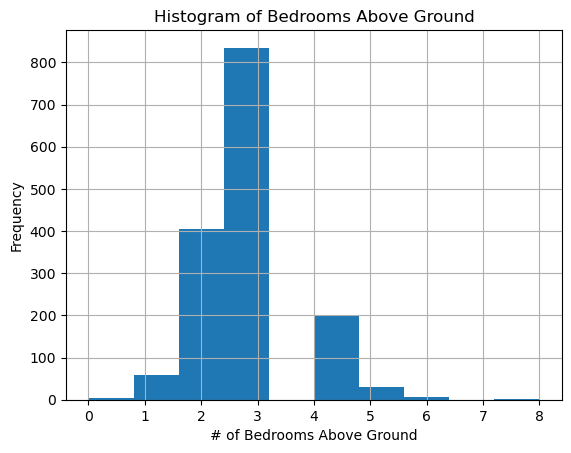

In [44]:
train['Bedroom AbvGr'].hist()


plt.title('Histogram of Bedrooms Above Ground')
plt.xlabel('# of Bedrooms Above Ground')
plt.ylabel('Frequency')
plt.show()

Analyzing distribution for Bedrooms Above Ground. There is generally a normal distribution however there seems to be no rooms for some of the counts.

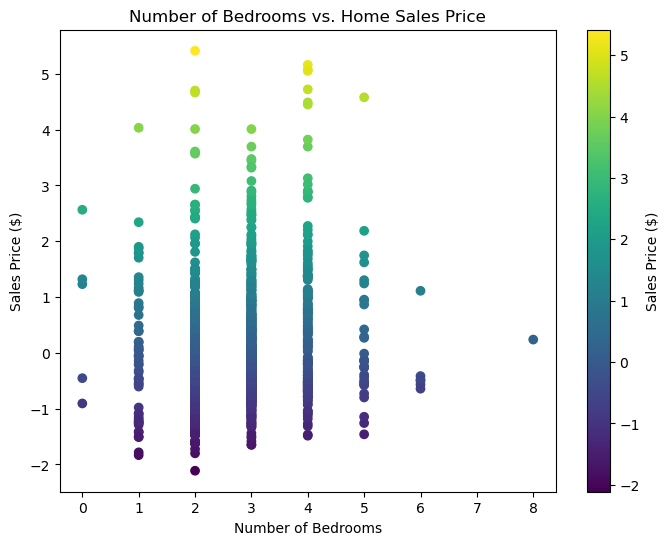

In [45]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(train['Bedroom AbvGr'], train['SalePrice'], c=train['SalePrice'], cmap='viridis')
plt.colorbar(label='Sales Price ($)')


plt.xlabel('Number of Bedrooms')
plt.ylabel('Sales Price ($)')
plt.title('Number of Bedrooms vs. Home Sales Price')


plt.show()

This scatterplot shows that there is not a relationship or positive correlation between home sales price and bedrooms. This surprises me because I had thought that houses would be more expensive the more room they had however this does not show that.

In [46]:
train['Lot Area'].value_counts()

Lot Area
9600     26
7200     19
6000     16
10800    15
9000     14
         ..
7577      1
15431     1
12702     1
10110     1
1869      1
Name: count, Length: 1159, dtype: int64

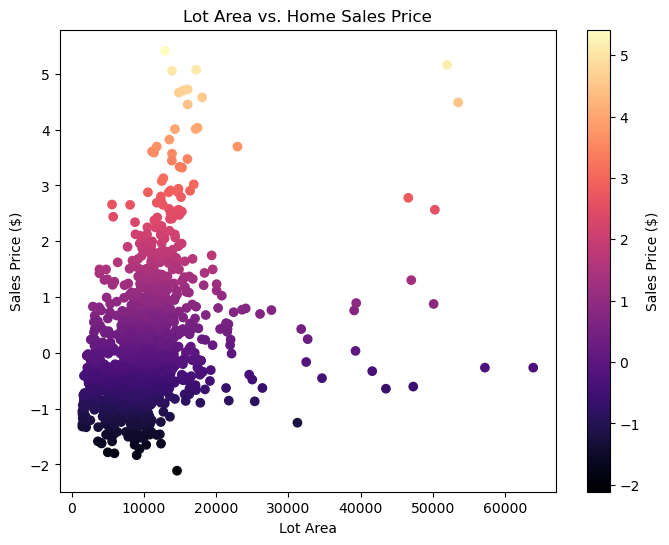

In [47]:
import pandas as pd
import matplotlib.pyplot as plt


# Create the scatter plot with a color bar
plt.figure(figsize=(8, 6))
plt.scatter(train['Lot Area'], train['SalePrice'], c=train['SalePrice'], cmap='magma')
plt.colorbar(label='Sales Price ($)')

# Add labels and title
plt.xlabel('Lot Area')
plt.ylabel('Sales Price ($)')
plt.title('Lot Area vs. Home Sales Price')

# Display the plot
plt.show()

This chart shows that there is a positive linear relationship between sales price and lot frontage with a few outliers. I decided to include the outliers because I believe including there shows an intresting relationship with prices. These outliers show that even house that have larger lot areas arent always the expensive homes. This seems to be intresting to study for houses in Ames. 

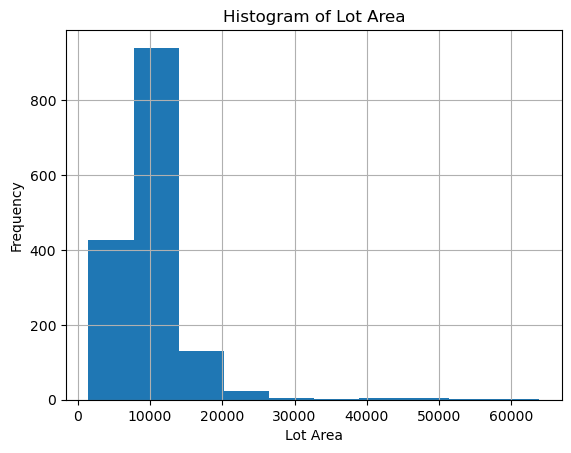

In [48]:
train['Lot Area'].hist()

plt.title('Histogram of Lot Area')
plt.xlabel('Lot Area')
plt.ylabel('Frequency')
plt.show()

Analyzing distribution for Lot Area. There is a right skew of the data meaning that there are smaller Lot areas in Ames.

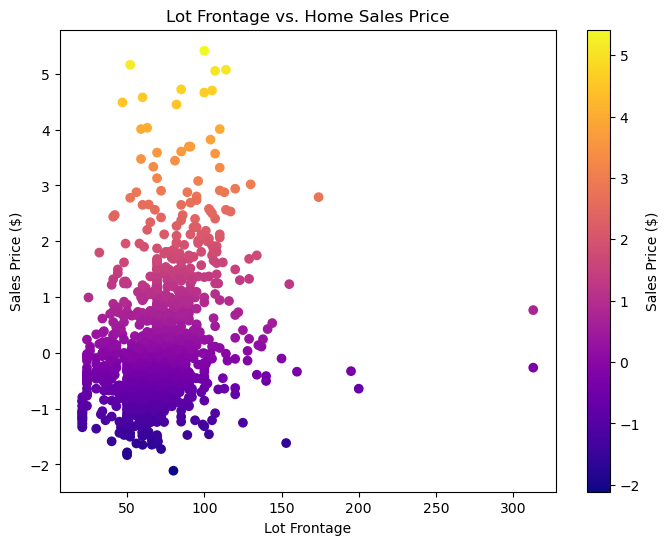

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

 # Replace with your actual train data file path


plt.figure(figsize=(8, 6))
plt.scatter(train['Lot Frontage'], train['SalePrice'], c=train['SalePrice'], cmap='plasma')
plt.colorbar(label='Sales Price ($)')


plt.xlabel('Lot Frontage')
plt.ylabel('Sales Price ($)')
plt.title('Lot Frontage vs. Home Sales Price')


plt.show()

This chart shows that there is a positive linear relationship between sales price and lot frontage with a few outliers. I decided to include the outliers because I believe including there shows an intresting relationship with prices. 

In [50]:
train['Lot Frontage'].value_counts()

Lot Frontage
69.37821     253
60.00000     133
80.00000      72
70.00000      66
75.00000      60
            ... 
116.00000      1
122.00000      1
141.00000      1
25.00000       1
144.00000      1
Name: count, Length: 113, dtype: int64

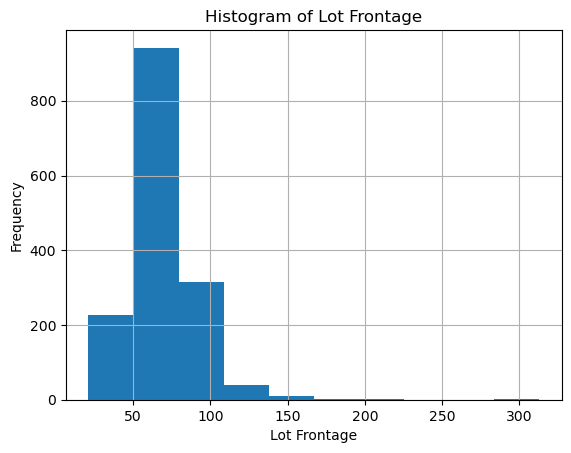

In [51]:
train['Lot Frontage'].hist()

plt.title('Histogram of Lot Frontage')
plt.xlabel('Lot Frontage')
plt.ylabel('Frequency')
plt.show()

Analyzing distribution for Lot Frontage.

From anazlyzing the data, we can see that many of the features tend to be right skewed. We will not only scale and normalize the features. 

In [52]:
# Normalization, scaling data for Training features
scaler = StandardScaler()
train['Lot Frontage'] = scaler.fit_transform(train[['Lot Frontage']])

In [53]:
train['Lot Area'] = scaler.fit_transform(train[['Lot Area']])

In [54]:
train['Year Remod/Add'] = scaler.fit_transform(train[['Year Remod/Add']])

In [55]:
train['Bedroom AbvGr'] = scaler.fit_transform(train[['Bedroom AbvGr']])

In [56]:
train['Overall Qual'] = scaler.fit_transform(train[['Overall Qual']])

In [57]:
train['Overall Cond'] = scaler.fit_transform(train[['Overall Cond']])

In [58]:
train.head(20)

,Unnamed: 0,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice
0,532,1612,526352080,20,0.709561,0.131102,-0.076947,0.400164,1971,-0.629478,...,7,1,1971.0,2.0,525.0,0,44,3,2007,-0.173048
1,415,2045,904100100,70,1.708828,0.540450,0.623315,2.218337,1937,-0.199259,...,7,2,1937.0,2.0,498.0,521,0,4,2007,0.477046
2,273,1962,535451110,20,-0.425970,-0.507892,-0.777209,2.218337,1950,0.852389,...,5,0,1980.0,2.0,720.0,194,0,7,2007,-0.654647
3,1460,229,905109130,60,0.482455,0.745400,0.623315,-0.508923,1996,0.613378,...,7,0,1996.0,2.0,533.0,296,44,4,2010,1.847653
4,250,1105,528363020,60,0.000000,0.363699,1.323577,1.309251,1995,0.517774,...,9,1,1995.0,3.0,751.0,192,87,6,2008,1.369827
5,413,909,909178160,50,-0.425970,-0.010262,-0.076947,1.309251,1940,-1.633324,...,7,1,1940.0,1.0,240.0,335,0,7,2009,-0.522616
6,1340,2642,902106090,70,-0.516812,-0.645938,0.623315,1.309251,1900,-0.677280,...,7,0,1985.0,2.0,576.0,264,0,5,2006,-0.517586
7,310,1462,907255060,20,0.000000,0.903904,1.323577,-0.508923,2002,0.900191,...,6,1,2002.0,3.0,715.0,182,35,6,2008,1.495570
8,1723,279,908103350,80,-0.198864,-0.672847,-0.076947,0.400164,1975,-0.438269,...,5,1,1975.0,1.0,352.0,0,0,6,2010,-0.702429
9,585,1173,533217050,160,-2.061134,-1.436802,0.623315,-0.508923,1999,0.756785,...,4,0,1999.0,2.0,462.0,0,48,3,2008,-0.264841


Now that we have scaled, normalized and filled in values, we will take a further look at our features in relation to our target which is sales price

In my EDA, I explored the features of my training data by viewing their distributions, outliers, counts and then normalized, scaled, filled nulls and explored some of the relationship with sales. After analyzing the data, I decided that I will be expiriementing on features all the following features. 

- Bedrooms = 'Bedroom AbvGr' - numerical
- Square ft of homes = Lot Area - numerical
- Square ft of outer exterior  = Lot Frontage - numerical

While I believe i will be able to answer my problem statement, I am curious to explore what I will discover along the way. My intention is to bring back categorical data during my modeling process. 

Note: Before I begin my models, I want to reintroduce my categorical data back to my training model.

In [59]:
#pip install -U scikit-learn

In [60]:
train.head()

,Unnamed: 0,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice
0,532,1612,526352080,20,0.709561,0.131102,-0.076947,0.400164,1971,-0.629478,...,7,1,1971.0,2.0,525.0,0,44,3,2007,-0.173048
1,415,2045,904100100,70,1.708828,0.540450,0.623315,2.218337,1937,-0.199259,...,7,2,1937.0,2.0,498.0,521,0,4,2007,0.477046
2,273,1962,535451110,20,-0.425970,-0.507892,-0.777209,2.218337,1950,0.852389,...,5,0,1980.0,2.0,720.0,194,0,7,2007,-0.654647
3,1460,229,905109130,60,0.482455,0.745400,0.623315,-0.508923,1996,0.613378,...,7,0,1996.0,2.0,533.0,296,44,4,2010,1.847653
4,250,1105,528363020,60,0.000000,0.363699,1.323577,1.309251,1995,0.517774,...,9,1,1995.0,3.0,751.0,192,87,6,2008,1.369827


In [ ]:
#training


In [ ]:
#testing


In [ ]:
#


In [61]:
# Load the dataset
train_with_categorical = pd.read_csv('../project_2_ames/datasets/train_with_categorical.csv')

# Select the columns you want to one-hot encode
columns_to_encode = ['Kitchen Qual', 'Foundation']

# One-hot encode the selected columns
ohe = OneHotEncoder(sparse=False, drop='first')
X_encoded = ohe.fit_transform(train_with_categorical[columns_to_encode])

# Create a new dataframe with the encoded columns
encoded_df = pd.DataFrame(X_encoded, columns=ohe.get_feature_names_out(columns_to_encode))

# Fill missing values with the mean of the data
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
imputed_data = imputer.fit_transform(encoded_df)

train = pd.concat([train, encoded_df], axis=1)

# Save the updated dataset
train_with_categorical.to_csv('../project_2_ames/datasets/train_with_categorical.csv', index=False)

This is my attempt to bring back two columns to use later in the regression process.

In [62]:
# Create the one-hot encoder
ohe = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the selected columns
X_encoded = ohe.fit_transform(train_with_categorical[columns_to_encode])

# Create a new dataframe with the encoded columns
encoded_df = pd.DataFrame(X_encoded, columns=ohe.get_feature_names_out(columns_to_encode))

# Concatenate the encoded columns with the original training data
train_with_categorical = pd.concat([train_with_categorical, encoded_df], axis=1)

# Modeling

My goals is to create a linear, ridge and lasso regression model with the following features to see which model best answers my problem statement if dimensions have an impact on home prices and if they should be included from an estimator prespective. I also am looking to predict if these features will predict home prices the best. 

- Bedrooms = 'Bedroom AbvGr' - numerical
- Square ft of homes = Lot Area - numerical
- Square ft of outer exterior = Lot Frontage - numerical

Creating first linear regression model with variables and will be incorporating lasso and ridge after.

In [63]:
#X = train(['Bedroom AbvGr', 'Year Remod/Add','Lot Frontage', 'Lot Area'], axis=1)
#y = train['SalePrice']
X = train[['Bedroom AbvGr', 'Lot Frontage', 'Lot Area']]
y = train['SalePrice']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

Splitting my test, training and validation data.

In [65]:
X.head(5)

,Bedroom AbvGr,Lot Frontage,Lot Area
0,0.201944,0.709561,0.131102
1,0.201944,1.708828,0.540450
2,0.201944,-0.425970,-0.507892
3,0.201944,0.482455,0.745400
4,1.419944,0.000000,0.363699


Now that I seperated training, test and validation, I will create the first model.

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
# Fit a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [68]:
lr.coef_

array([0.06946567, 0.1107222 , 0.28591783])

In [69]:
y.mean()

4.6199137565676216e-18

In [70]:
# Make predictions on the test data
y_pred = lr.predict(X_test)
y_pred

array([ 2.34876174e-01, -1.03477056e-01,  6.94207627e-02, -5.29973227e-01,
        1.19948542e-02,  1.82896808e-01,  1.89604269e-01,  8.14299791e-03,
       -1.10679034e-01,  1.65629041e-01, -4.76145648e-02,  7.57189470e-02,
       -9.81669453e-02,  1.96692091e-01,  4.91783662e-02, -7.11234848e-01,
       -5.21751042e-01, -2.03873936e-01,  1.52191350e-01,  1.25783425e-01,
        4.07468742e-02, -3.28220174e-01, -2.18941925e-02,  1.67005307e-01,
       -4.54490094e-02, -1.18576742e-01,  4.20527758e-01,  3.53854291e-02,
        9.98200153e-02,  9.46377738e-02, -3.62560748e-01, -1.80950331e-02,
       -2.19216888e-01, -2.14799474e-03,  5.30938744e-01, -3.08943109e-01,
        4.19997944e-02,  7.55955983e-02, -6.85029542e-02, -9.93585257e-02,
       -7.27807066e-02, -2.04629177e-01,  2.25254582e-01, -3.18369026e-01,
       -2.06519100e-01, -9.14540019e-02, -2.77209488e-02,  2.97487834e-01,
        3.39586915e-01, -1.86308287e-01,  1.88497630e-02,  3.11061141e-01,
       -3.78861823e-01,  

In [71]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.8673783481668563


In [72]:
lr.score(X_train, y_train) 

0.14910060058115893

In [73]:
y_val = y_val[:289]
y_pred = y_pred[:289]

In [74]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.0458471295757363


In [75]:
# Calculate R-squared
r2 = lr.score(X_val, y_val)
print("R-squared Score:", r2)

R-squared Score: 0.13729740330784101


In [76]:
pred_val_linear = lr.predict(X_val)
pred_val_linear

array([-6.53998429e-02, -1.20483484e-01,  5.38945155e-01, -6.84482774e-03,
        7.96966436e-02, -1.63797433e-01, -1.44615789e-01, -4.34751227e-01,
        1.53398040e-01, -2.75073182e-02,  2.69385435e-01, -2.77130352e-01,
       -4.52813271e-01, -3.75543600e-01, -2.80192103e-01,  1.82600923e-01,
       -9.64595363e-02, -7.57940360e-01,  6.63271929e-01, -2.18174755e-01,
       -4.37913037e-01,  3.28577600e-01, -4.76539810e-01,  1.06847312e-01,
       -3.91775954e-03, -3.84445042e-01,  8.31104183e-01, -7.37477867e-01,
       -4.19071178e-01, -4.25548566e-01, -1.28089152e-03, -3.61739526e-01,
        1.17046073e-01, -2.41829441e-03, -2.31823568e-03, -1.30106556e-01,
       -4.78861628e-01,  4.87264880e-01, -8.23510822e-02,  6.94437033e-02,
        5.44054105e-01,  1.20495123e-01,  7.79049515e-02, -6.83688178e-02,
       -2.20331817e-01,  5.88072224e-01,  7.09328455e-02,  6.38304105e-01,
        9.28504033e-02, -1.30976621e-01, -2.18941925e-02,  2.95214039e-01,
       -4.48347008e-01, -

In [77]:
lr.score(X_train, y_train) 

0.14910060058115893

In [78]:
lr.score(X_test, y_test) 

0.11420048594714127

Calculating Mean Squared Error (MSE) and R-squared

In [79]:
print(len(y_test))
print(len(y_pred))

385
289


In [80]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test, y_pred)
# plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--')
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")
# plt.title("Actual vs. Predicted Values")
# plt.show()

In [81]:
# Creating baseline and comparing this model to baseline

In [82]:
np.ones(len(y))
baseline_preds = np.ones(len(y)) * y.mean()
baseline_preds

array([4.61991376e-18, 4.61991376e-18, 4.61991376e-18, ...,
       4.61991376e-18, 4.61991376e-18, 4.61991376e-18])

In [83]:
mean_squared_error(y, baseline_preds, squared = False)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.0

In [84]:
y_test.shape

(385,)

In [85]:
baseline_preds = np.random.rand(1538) 

baseline_preds = baseline_preds[:308]  

print(baseline_preds.shape)

(308,)


In [86]:
baseline_mse = 1.2915522751012547

r_squared = lr.score(X_train, y_train)

if baseline_mse < r_squared:
    print("Baseline model performs better than the current model.")
else:
    print("Current model performs better than the baseline model.")

if r_squared > 0:
    print("Current model has a positive R-squared value.")
else:
    print("Current model has a negative R-squared value.")

Current model performs better than the baseline model.
Current model has a positive R-squared value.


# Lasso model

In [87]:
#Standardizing the input features before fitting the model, as Lasso is sensitive to the scale 
#of the variables

In [88]:
X = train.drop(['Bedroom AbvGr', 'Lot Frontage', 'Lot Area'], axis=1)
y = train['SalePrice']

In [89]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)
print("Best alpha value:", lasso_cv.alpha_)

Best alpha value: 0.016941572303849274


In [90]:
lasso = Lasso(alpha= 0.016941572303849274, random_state=42)
lasso.fit(X_train, y_train)

Lasso(alpha=0.016941572303849274, random_state=42)

In [91]:
coefs = lasso.coef_
print("Lasso coefficients:", coefs)

Lasso coefficients: [0.05597449 0.10299308 0.27631922]


In [92]:
# Evaluate the model on the test set
test_score = lasso.score(X_test, y_test)
print("Test R-squared score:", test_score)

Test R-squared score: 0.11227315046646114


In [93]:
y_pred = lasso.predict(X_train)
y_pred

array([ 2.02375945e-01,  1.90903421e-01,  5.91349120e-03,  2.26382219e-02,
       -6.54001997e-01, -2.96328598e-01, -5.99072811e-01,  3.56902582e-02,
       -3.56583380e-01,  4.25305285e-02, -4.13394815e-01,  1.84364254e-01,
        2.49506607e-01, -4.91170794e-01, -4.93440726e-01,  9.95648359e-03,
        8.34960877e-02, -2.99402765e-02,  1.98069656e-01, -2.80686526e-01,
        6.12123655e-02,  1.43876710e-01, -3.65543370e-02, -1.88528579e-01,
       -1.82567447e-02,  2.10918037e-01, -1.73236350e-01,  3.60200207e-01,
        2.37356751e-01, -8.95257197e-02,  3.39238991e-01, -1.29998764e-01,
       -3.00220958e-01,  3.24207203e-03,  3.56902582e-02,  5.72995700e-02,
        1.55083214e-02,  9.68689432e-02,  1.85484664e-01,  1.65926229e-01,
        2.06385345e-01,  7.62348988e-01, -4.47962282e-01, -6.15878962e-01,
        3.10459895e-01,  1.36730873e-01, -3.70057394e-01, -8.66221928e-02,
        4.12089093e-01, -1.23960876e-01, -2.26579462e-01,  2.59895993e-01,
        1.54647270e-02,  

In [94]:
# Calculate MSE
mse = mean_squared_error(y_train, y_pred)
mse

0.8842237265351621

In [95]:
# Calculate RMSE
rmse = np.sqrt(mse)
rmse

0.9403317109058708

In [96]:
# Calculate R-squared on the training set
r2_train = lasso.score(X_train, y_train)
r2_train

0.14859786896205995

In [97]:
lasso.score(X_test, y_test)

0.11227315046646114

# Ridge Model

In [98]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [99]:
X = train.drop(['Bedroom AbvGr', 'Lot Frontage', 'Lot Area'], axis=1)
y = train['SalePrice']

In [100]:
ridge = Ridge(alpha=1.0)  # Specify alpha (regularization strength)
ridge.fit(X_train, y_train)

Ridge()

In [101]:
y_pred = ridge.predict(X_test)


ss_res = np.sum((y_test - y_pred)**2)
ss_tot = np.sum((y_test - np.mean(y_test))**2)
r2 = 1 - (ss_res / ss_tot)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

R-squared: 0.11
RMSE: 0.93


In [102]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas=np.logspace(-3, 3, 7))
ridge_cv.fit(X_train, y_train)
print(f"Optimal alpha: {ridge_cv.alpha_:.2f}")

y_pred_cv = ridge_cv.predict(X_test)
r2_score_cv = ridge_cv.score(X_test, y_test)
mse_cv = mean_squared_error(y_test, y_pred_cv)
rmse_cv = np.sqrt(mse_cv)

print(f"R-squared (CV): {r2_score_cv:.2f}")
print(f"RMSE (CV): {rmse_cv:.2f}")

Optimal alpha: 100.00
R-squared (CV): 0.11
RMSE (CV): 0.93


In [103]:
# Evaluate the model on training and test sets
train_score_ridge = ridge.score(X_train, y_train)
test_score_ridge  = ridge.score(X_test, y_test)
print("Training R-squared score:", train_score_ridge)
print("Test R-squared score:", test_score_ridge)

Training R-squared score: 0.1491005026745612
Test R-squared score: 0.11421534215010576


# Cross validation

In [104]:
pipe_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])


pipe_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())
])


pipe_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso())
])


scores_linear = cross_val_score(pipe_linear, X, y, cv=5)
scores_ridge = cross_val_score(pipe_ridge, X, y, cv=5)
scores_lasso = cross_val_score(pipe_lasso, X, y, cv=5)


print('Linear regression:', scores_linear.mean())
print('Ridge regression:', scores_ridge.mean())
print('Lasso regression:', scores_lasso.mean())

Linear regression: 1.0
Ridge regression: 0.9999955604916316
Lasso regression: 0.014870448748886721


In [105]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1.0, 10.0]}
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
grid_search.fit(X, y)

best_lasso_model = grid_search.best_estimator_

In [106]:
best_lasso_model

Lasso(alpha=0.1)

In [107]:
X_train.shape

(864, 3)

In [108]:
y_train.shape

(864,)

In [109]:
X_test.shape

(385, 3)

In [110]:
y_test.shape

(385,)

In [111]:
print(f"X_train shape: {X_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (864, 3)
y_test shape: (385,)


In [112]:
X_train = X_train[:y_test.shape[0]]

In [113]:
best_lasso_model.fit(X_train, y_test)

Lasso(alpha=0.1)

# Code for kaggle submission

In [114]:
#best_lasso_model.fit(X_train, y_test);

In [127]:
test_preds = best_lasso_model.predict(X_train, y_test);

TypeError: LinearModel.predict() takes 2 positional arguments but 3 were given

In [116]:
test_preds.shape

(385,)

In [117]:
test.shape

(513, 33)

In [118]:
test_preds_extended = np.pad(test_preds, (0, test.shape[0] - len(test_preds)), mode='constant', constant_values=0)

# Assign the extended test_preds to the 'SalePrice' column in test
test['SalePrice'] = test_preds_extended

print(test.shape)  # (513, 34)
print(test.head())

(513, 34)
   Unnamed: 0    Id        PID  MS SubClass  Lot Frontage  Lot Area  \
0        1124  2782  907200170           80          55.0     10780   
1         188  2569  535125060           60          88.0     14200   
2        1727  1062  528142020           60          74.0      8899   
3        1658   287  909100110           70          66.0      6858   
4        1424  2809  907410040           60          74.0      8581   

   Overall Qual  Overall Cond  Year Built  Year Remod/Add  ...  TotRms AbvGrd  \
0             5             5        1976            1976  ...              6   
1             7             6        1966            1966  ...              8   
2             8             5        2007            2007  ...             10   
3             6             4        1915            1950  ...              6   
4             7             5        2006            2006  ...              7   

   Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  Wood Deck SF  \
0   

In [119]:
test['SalePrice'] = test_preds_extended

In [120]:
test['Unnamed: 0'] = test['Unnamed: 0'].astype(int)

In [123]:
submission = test[['Unnamed: 0', 'SalePrice']].set_index('Unnamed: 0')
submission.head()

,SalePrice
Unnamed: 0,
1124,0.029962
188,0.029962
1727,0.029962
1658,0.029962
1424,0.029962


In [124]:
# kaggle_submission_5 = pd.DataFrame({
#     'Unnamed: 0': test['Unnamed: 0'],
#     'SalePrice': test_preds
# }).set_index('Unnamed: 0')
# kaggle_submission_5.to_csv('an_kaggle_submission_5.csv')

# Final Submission

In [125]:
submission.to_csv('../project_2/datasets/submission.csv')

# Results 

Linear

Training score: 

0.14910060058115893

Testing score: 

0.11420048594714127

Lasso

Training score:

0.14859786896205995

Testing score: 

0.11227315046646114

Ridge

Training score:

0.1491005026745612

Testing score: 

0.11421534215010576

# Interpretation

In summary, my lasso model was the best, compared to the lasso and ridge. This is because it was the least overfit meaning the r square value was least closest to 1 and suited best for the sale price data. I also obtained a lower test score from all the models which indicates that the performace may be better compared to the other mdoels as well. 

During my cross validation, my expected results changed from the score that I had expected. I believe the reason for this because before the cross validation, I was not able to bring back part of my training data meaning, that my test and training data were imapcted even before the cross validation. Another reason I may have obatined the results that I did was because I did not incorporate other features and in general did not use many features at all and stuck with the same three which were lot area, lot frontage, and bedrooms above ground. The result above are my testing and training r squared scores before the cross validation.

For the linear regression model, I obtained a 1, meaning that the model fit perfectly. In this case, I beleive there was an error with overfitting of the model. This could have been for many reasons however I think it mainly had to do with the size of the data and features as I mentione before changed. Althouh my current model before cross validation performed better than the baseline model and had a positive R-squared value, it still did not perform well in the cross validation step.

For the ridge model, while I was close to 1, I believe the score still was a result of overfitting and underperforming. This model adn the linear regression model both performed very similarly comapring the trainign and testing score values. I did not find the best alpha for the ridge model which could have impacted the r squared and mse. 

-----------------------------
This was my previous summary before my results changed with cross validation 

In summary, my lasso model was the best. It had the highest r-squared in both the training and test compared to ridge and linear regression. My lasso also had the lower MSE which shows that the model perfomed best. my coefficients were closer to 0 than the other models which shows that is worked better Lasso model has the highest R-squared score on both the training and test sets compared to the other two models. It also showed more potential for feature selection. In terms of asnwering my problem statement and question, I found that There is an impact based on the relationship and may be worth considering for further investigation however, the impact is not stark. My Recommendation would be to onsider it a factor, but not the only one. While not the only factor(example: bedrooms), dimensions still have an impact on the price of homes in Ames Iowa.